In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
test_jan23 = pd.read_parquet('data/yellow_tripdata_2023-01.parquet', engine='fastparquet')

In [8]:
train_22 = pd.read_parquet('data/2022/yellow_tripdata_2022-01.parquet', engine='fastparquet')
for i in range(2,13):
    if i<10:
        train_new = pd.read_parquet('data/2022/yellow_tripdata_2022-0'+str(i)+'.parquet', engine='fastparquet')
    else: 
        train_new = pd.read_parquet('data/2022/yellow_tripdata_2022-'+str(i)+'.parquet', engine='fastparquet')
    train22 = train_22.append(train_new)

In [9]:
print(train22.shape)
train22.head()

(5863480, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [10]:
zones = pd.read_csv('data/taxi+_zone_lookup.csv')
zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [11]:
zones_manh = zones[zones.Borough=='Manhattan']
PUzones_manh = zones_manh.copy()
DOzones_manh = zones_manh.copy()
PUnames = {'LocationID':'PULocationID', 'Borough':'PUBorough', 'Zone':'PUZone', 'service_zone':'PUservice_zone'}
DOnames = {'LocationID':'DOLocationID', 'Borough':'DOBorough', 'Zone':'DOZone', 'service_zone':'DOservice_zone'}
PUzones_manh.rename(columns=PUnames,inplace=True)
DOzones_manh.rename(columns=DOnames,inplace=True)

In [13]:
train22_joined = train22.merge(PUzones_manh, on = 'PULocationID', how = 'left')
train22_joined.head()
# zones.Borough.unique()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUBorough,PUZone,PUservice_zone
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0.5,3.65,0.0,0.3,21.95,2.5,0.0,Manhattan,Lincoln Square East,Yellow Zone
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.5,4.00,0.0,0.3,13.30,0.0,0.0,Manhattan,Upper East Side North,Yellow Zone
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.5,1.76,0.0,0.3,10.56,0.0,0.0,Manhattan,Morningside Heights,Boro Zone
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.5,0.00,0.0,0.3,11.80,2.5,0.0,Manhattan,Greenwich Village South,Yellow Zone
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.5,3.00,0.0,0.3,30.30,2.5,0.0,Manhattan,East Chelsea,Yellow Zone


In [14]:
train22_joined = train22_joined.merge(DOzones_manh, on = 'DOLocationID', how = 'left')
train22_joined.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0.3,21.95,2.5,0.0,Manhattan,Lincoln Square East,Yellow Zone,Manhattan,Upper East Side North,Yellow Zone
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.3,13.30,0.0,0.0,Manhattan,Upper East Side North,Yellow Zone,Manhattan,Central Harlem North,Boro Zone
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.3,10.56,0.0,0.0,Manhattan,Morningside Heights,Boro Zone,Manhattan,Morningside Heights,Boro Zone
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.3,11.80,2.5,0.0,Manhattan,Greenwich Village South,Yellow Zone,Manhattan,East Chelsea,Yellow Zone
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.3,30.30,2.5,0.0,Manhattan,East Chelsea,Yellow Zone,Manhattan,Midtown North,Yellow Zone


In [15]:
train22_joined.dropna(subset = ['PUBorough'], inplace = True)
print(train22_joined.shape)
train22_joined.head()

(5228234, 25)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0.3,21.95,2.5,0.0,Manhattan,Lincoln Square East,Yellow Zone,Manhattan,Upper East Side North,Yellow Zone
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.3,13.30,0.0,0.0,Manhattan,Upper East Side North,Yellow Zone,Manhattan,Central Harlem North,Boro Zone
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.3,10.56,0.0,0.0,Manhattan,Morningside Heights,Boro Zone,Manhattan,Morningside Heights,Boro Zone
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.3,11.80,2.5,0.0,Manhattan,Greenwich Village South,Yellow Zone,Manhattan,East Chelsea,Yellow Zone
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.3,30.30,2.5,0.0,Manhattan,East Chelsea,Yellow Zone,Manhattan,Midtown North,Yellow Zone


In [16]:
train22_joined.drop(['PUBorough', 'DOBorough', 'PUservice_zone', 'DOservice_zone'], axis = 1, inplace = True)
train22_joined.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUZone,DOZone
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,Lincoln Square East,Upper East Side North
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,Upper East Side North,Central Harlem North
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,Morningside Heights,Morningside Heights
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,Greenwich Village South,East Chelsea
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,East Chelsea,Midtown North


### Zone Mapping:

In [17]:
zone_names = set(list(train22_joined.DOZone.unique())+ list(train22_joined.PUZone.unique()))

In [18]:
mapping ={
    1 : ['Morningside Heights', 'Manhattanville', 'Central Harlem', 'Central Harlem North','Bloomingdale', 'Lincoln Square East','Lincoln Square West', 'Manhattan Valley', 'Upper West Side North','Upper West Side South','Central Park'],
    2 : [ 'East Harlem North', 'East Harlem South', 'Lenox Hill East', 'Lenox Hill West', 'Upper East Side North','Upper East Side South', 'Yorkville East','Yorkville West'],
    3 : ['Meatpacking/West Village West', 'West Village', 'Clinton East', 'Clinton West', 'Penn Station/Madison Sq West', 'Midtown Center', 'Midtown East', 'Midtown North', 'Times Sq/Theatre District', 'Flatiron','Midtown South', 'Union Sq'],
    4 : [ 'Murray Hill',  'Sutton Place/Turtle Bay North', 'UN/Turtle Bay South', 'East Chelsea', 'Garment District',  'West Chelsea/Hudson Yards', 'Gramercy', 'Kips Bay','Stuy Town/Peter Cooper Village'],
    5 : ['Alphabet City','East Village', 'Lower East Side', 'Financial District North', 'Financial District South'],
    6 : ['Hudson Sq', 'SoHo', 'Little Italy/NoLiTa', 'TriBeCa/Civic Center', 'Chinatown', 'World Trade Center', 'Battery Park', 'Battery Park City'],
}

In [19]:
mappings_rev={}
for k in mapping.keys():
    mappings_rev[tuple(mapping[k])]=k

In [20]:
def zone_map(locality):
    for i in mappings_rev.keys():
        if locality in i:
            return int(mappings_rev[i])
    return -1

In [21]:
train22_joined['PU_CustomZoneID']=train22_joined['PUZone'].map(zone_map)
train22_joined['DO_CustomZoneID']=train22_joined['DOZone'].map(zone_map)

In [22]:
train22_joined.shape

(5228234, 23)

In [23]:
#Removing Rows with Missing Custom Zones
train22_joined=train22_joined[(train22_joined.PU_CustomZoneID!=-1)| (train22_joined.DO_CustomZoneID==-1)]

In [24]:
train22_joined.shape

(5082590, 23)

In [25]:
train22_joined.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUZone,DOZone,PU_CustomZoneID,DO_CustomZoneID
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,3.65,0.0,0.3,21.95,2.5,0.0,Lincoln Square East,Upper East Side North,1,2
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,4.00,0.0,0.3,13.30,0.0,0.0,Upper East Side North,Central Harlem North,2,1
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,1.76,0.0,0.3,10.56,0.0,0.0,Morningside Heights,Morningside Heights,1,1
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,3.00,0.0,0.3,30.30,2.5,0.0,East Chelsea,Midtown North,4,3
6,2,2022-01-01 00:20:50,2022-01-01 00:34:58,1.0,5.07,1.0,N,233,87,1,...,5.20,0.0,0.3,26.00,2.5,0.0,UN/Turtle Bay South,Financial District North,4,5


### Compute Demand Matrix Pt

In [26]:
# Restricting data to year of 2022
train22_joined = train22_joined[(train22_joined.tpep_pickup_datetime>'2022-01-01 00:00:00') & (train22_joined.tpep_pickup_datetime<'2023-01-01 00:00:00')].sort_values(by='tpep_pickup_datetime')


In [27]:
def compute_pt(data_subset):
    pt = np.zeros((6,6))
    for i in range(data_subset.shape[0]):
        x = data_subset.iloc[i,:]
        pt[x[-2]-1,x[-1]-1]+=1
    return pt 

In [33]:
def master_compute_pt(data):
    start = pd.to_datetime('2022-01-01 00:00:00')
    end= start+pd.Timedelta(minutes=30)
    master_pt= compute_pt(data[(data.tpep_pickup_datetime>start) & (data.tpep_pickup_datetime<end)].sort_values(by='tpep_pickup_datetime'))
    start=end
    
    while start < pd.to_datetime('2023-01-01 00:00:00'):
        print(start)
        end= start+pd.Timedelta(minutes=30)    
        data_subset = data[(data.tpep_pickup_datetime>start) & (data.tpep_pickup_datetime<end)].sort_values(by='tpep_pickup_datetime')
        pt = compute_pt(data_subset)
        master_pt = np.dstack((master_pt,pt))
        start = end
    return master_pt


In [ ]:
master_pt = master_compute_pt(train22_joined)

In [35]:
master_pt.shape

(6, 6, 17520)

In [36]:
np.save('data/master_pt_2022',master_pt)

## Frequency distribution of maximum demand in a time unit

(array([15099.,   286.,   247.,   249.,   365.,   428.,   394.,   288.,
          134.,    30.]),
 array([   0. ,  412.8,  825.6, 1238.4, 1651.2, 2064. , 2476.8, 2889.6,
        3302.4, 3715.2, 4128. ]),
 <BarContainer object of 10 artists>)

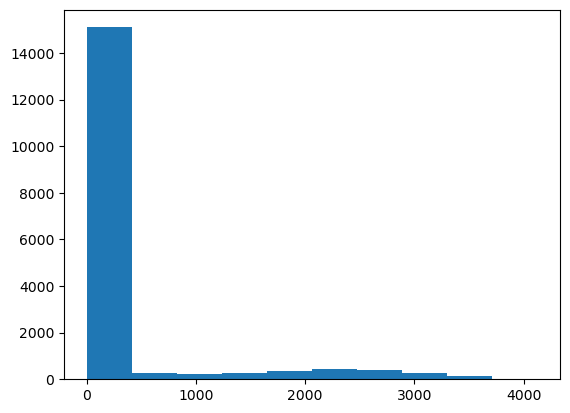

In [37]:
a=[]
for i in range(master_pt.shape[2]):
    a.append(np.sum(master_pt[:,:,i]))
    

plt.hist(a)

### Compute Cost Weight Matrices

In [40]:
wait_costs = np.zeros((6,6))
move_costs = np.zeros((6,6))

In [41]:
for i in range(6):
    for j in range(6):
        temp = train22_joined[(train22_joined.PU_CustomZoneID==i+1) & (train22_joined.DO_CustomZoneID==j+1)]
        avg_trip_dist = temp.trip_distance.sum()/temp.shape[0]
        avg_trip_cost = temp.total_amount.sum()/temp.shape[0]
        move_costs[i,j]=round(avg_trip_dist,2)
        wait_costs[i,j]=round(avg_trip_cost, 2)

In [42]:
wait_costs = (wait_costs-np.min(wait_costs))/(np.max(wait_costs)-np.min(wait_costs))
move_costs = (move_costs-np.min(move_costs))/(np.max(move_costs)-np.min(move_costs))

In [43]:
np.save('data/move_costs_22', move_costs)
np.save('data/wait_costs_22', wait_costs)

## Visualizing Demand for the 6 Boroughs

In [26]:
master_pt_small = np.load('data/master_pt_small.npy')

In [67]:
np.sum(master_pt[:,:,:],axis = 1).mean()

48.30974124809741

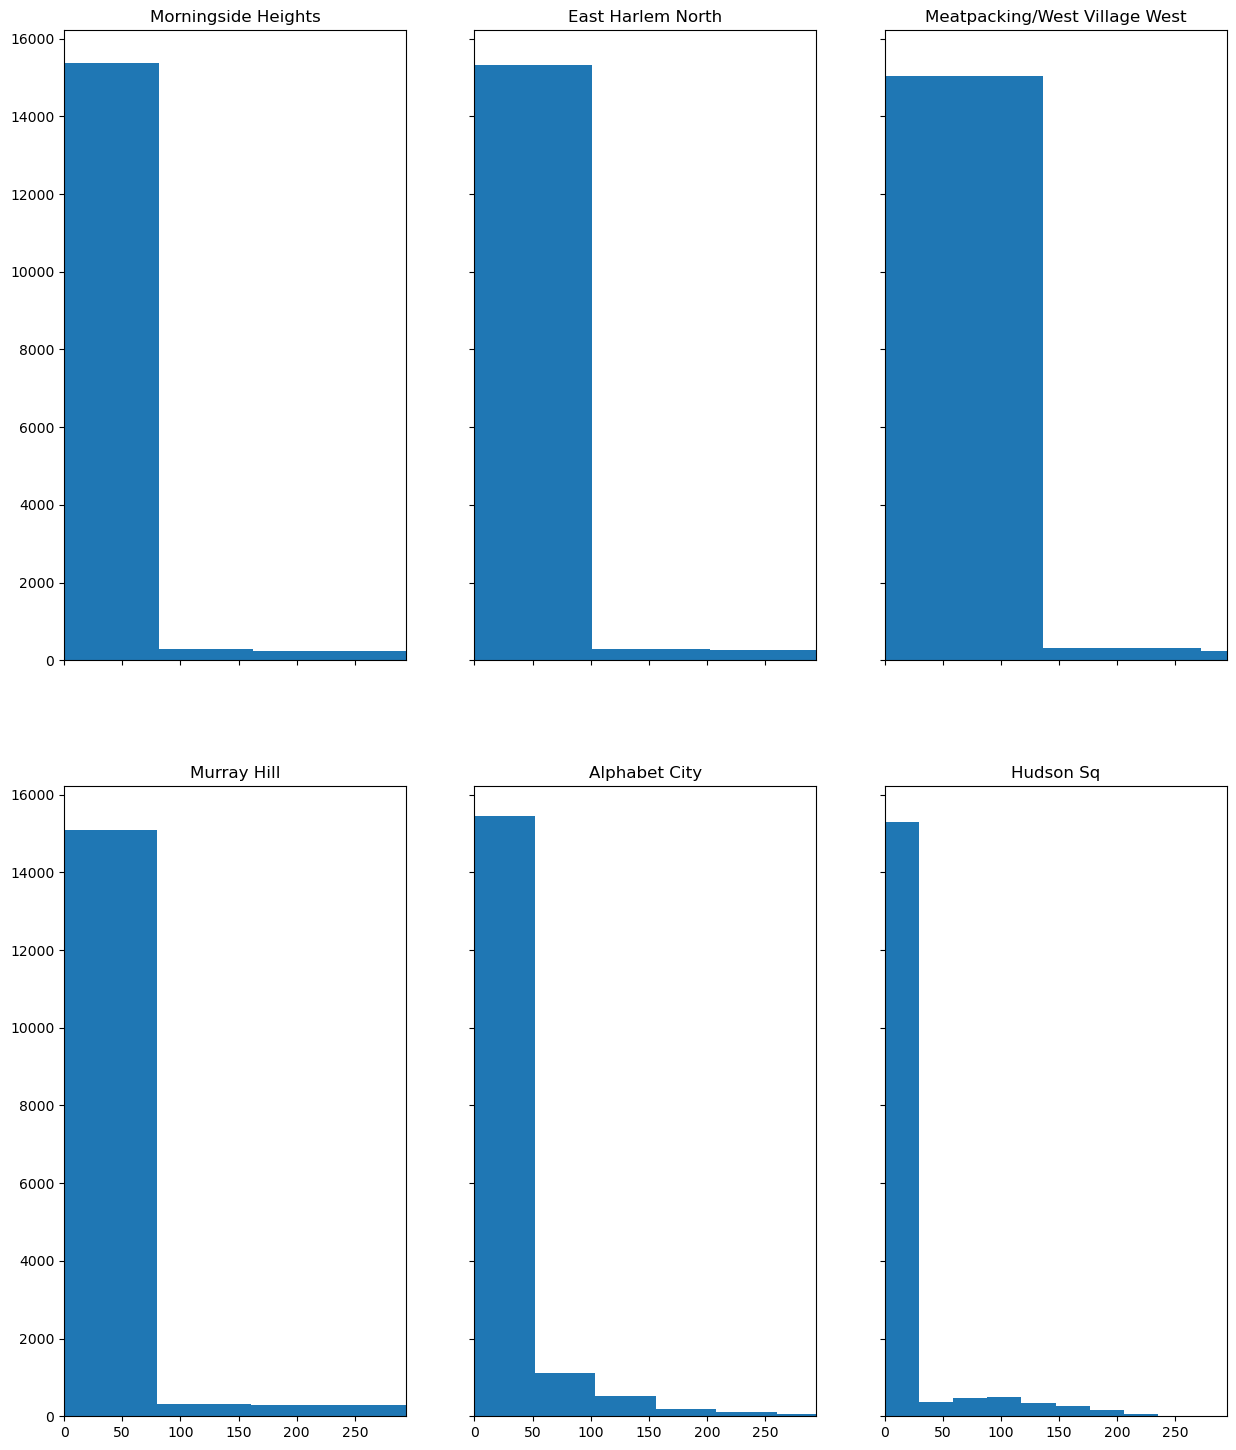

In [68]:
fig, axs = plt.subplots(2,3, sharex=True, sharey = True, figsize = (15,18))
index = 0 
total_demand_per_zone = np.sum(master_pt[:,:,:],axis = 1)
for i in range(2):
    for j in range(3):
        axs[i][j].hist(total_demand_per_zone[index])
        axs[i][j].set_xlim(total_demand_per_zone[index].min(), total_demand_per_zone[index].max())
        axs[i][j].title.set_text(mapping[index+1][0])
        index+=1